In [ ]:
import jieba
import collections
import math
import matplotlib.pyplot as plt
import jieba.analyse
from datetime import date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
from crawlerPtt import crawlerPtt
from collections import Counter

In [ ]:
"""爬蟲"""
# # 輸入看板名稱及要爬蟲的頁數
board = "Movie"
url = 'https://www.ptt.cc/bbs/{}/index.html'.format(board)
crawler = crawlerPtt(url, 22) # 抓取 2/16-2/23 的資料
result = crawler.getResult()

# # 爬蟲結果存成檔案(CSV)

file_name = "/content/ptt_{}_".format(board)+date.strftime(date.today(), format="%Y%m%d")+".csv"
result.to_csv(file_name, encoding='utf_8_sig')
print(f'{file_name} saved!')
result

/content/ptt_Movie_20230224.csv saved!


,title,content,author,link,postTime,comments
0,[討論] 史蒂芬連加入MCU雷霆特攻隊 可能飾演哨兵,隨著漫威影視宇宙（MCU）的不斷擴張，據報導他們最近延攬了一位《陰屍路》系列男星\n加入。\...,NogiHaruka (4組の副担任),https://www.ptt.cc/bbs/movie/M.1677206029.A.79...,Fri Feb 24 10:33:47 2023,"[[→, 哨兵很政治不正確吧 嗑藥白人變成最強腳色之一], [推, 史蒂芬元很有魅力，演技也..."
1,[新聞] 傳T.Holland有望出演泰山 將飾演森林之王,新聞網址：原標題:由美國作家愛德加萊斯巴勒斯（Edgar Rice Burroughs）創作...,kenny1300175 (蘇湖),https://www.ptt.cc/bbs/movie/M.1677206525.A.B4...,Fri Feb 24 10:42:03 2023,"[[推, 那身材誰要看啊], [推, 之前小丑女當女主角的泰山 是華納拍的], [→, 這..."
2,[新聞] Netflix證實「調降月費」最多便宜一半！,Netflix證實「調降月費」最多便宜一半！全球逾30國受惠\n\nETTODAY\n\n2...,joanzkow (星浪),https://www.ptt.cc/bbs/movie/M.1677207853.A.9F...,Fri Feb 24 11:04:11 2023,"[[推, 台灣有台灣的玩法.jpg], [推, 台灣漲價], [→, 台灣經濟太好 不需要降..."
3,[新聞] 《小美人魚》預告廣受非裔小孩好評！,新聞網址：2023-02-24 10:27:55\n\n\n今年暑假備受關注的迪士尼真人電影...,kenny1300175 (蘇湖),https://www.ptt.cc/bbs/movie/M.1677209480.A.01...,Fri Feb 24 11:31:17 2023,"[[→, 然後非洲人都沒錢去看 沒票房(誤], [→, 美國非裔10% 白人50% 好哦 老..."
4,[包場] 3/12 《本日公休》台北包場,Movie版的大家好～\n由傅孟柏主演的電影「本日公休」即將上映，邀請大家一起共襄盛舉\n\...,suyo0618 (suyo),https://www.ptt.cc/bbs/movie/M.1677209728.A.32...,Fri Feb 24 11:35:25 2023,[]
...,...,...,...,...,...,...
423,[新聞] 凱文費吉:征服者康是史上試映最高分反派,新聞網址：Yahoo奇摩電影戲劇編輯部\n2023年02月15日\n\n\n【文／血紅蘭姆】...,kenny1300175 (蘇湖),https://www.ptt.cc/bbs/movie/M.1676481130.A.46...,Thu Feb 16 01:12:08 2023,"[[噓, 親友試映裡，他是史上最高分的反派角色 <--這也行?], [→, 好處:可能是漫威..."
424,[極好雷] Aftersun日麗,防\n個\n雷\n雷\n雷\n雷\n雷\n雷\n雷\n雷\n雷\n雷\n雷\n雷\n雷\n雷...,roadrise (前路),https://www.ptt.cc/bbs/movie/M.1676483018.A.3C...,Thu Feb 16 01:43:36 2023,"[[推, 推，這部被近期許多好片埋沒，有點可惜], [→, 其實口碑有起來了，希望上映時間久..."
425,[討論] 《小美人魚》前導預告,剛剛迪士尼終於發了一支《小美人魚》的30秒前導預告\n\n直接上連結\n\n讓大家欣賞精美的...,shengchiu303 (Sheng),https://www.ptt.cc/bbs/movie/M.1676488288.A.1B...,Thu Feb 16 03:11:26 2023,"[[推, 歌聲好聽，生物特效微妙], [→, 這片87%會像巴斯光年一樣], [噓, 這小美..."
426,[ 好雷] Stand by me 哆啦A夢,防雷\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,tilwemeet (莓味),https://www.ptt.cc/bbs/movie/M.1676493845.A.C7...,Thu Feb 16 04:44:03 2023,"[[推, 第二集不是炸了？], [推, 第二集有期待的奶奶劇情 卻沒有1好看], [→, 靜..."


In [4]:
"""讀取爬蟲結果"""
ptt_data = pd.read_excel('/content/ptt_Movie_20230224.xlsx')
text = ','.join(ptt_data['title'])
text

'Re: [大負雷] 【蟻人與黃蜂女：量子狂熱】是AI劇本吧,Fw: [爆卦] 悲情的城市，悲情的大老婆?,[普好雷] 蟻人3 & 黑豹2 感想,[負無雷] 手撕英國人的《RRR雙雄起義》,[新聞] 《捍衛戰士》珍妮佛康納莉露毛演出！,[新聞] 韓媒推薦！人氣群星搶當【超完美狗保姆】,[新聞] 阿湯哥終於鬆口！曾洽談演鋼鐵人,[請益] 機器戰警(1987)的一個問題?,[新聞] 郭富城拍片摔傷 敬業喊值得,Re: [新聞] 漫威又被控訴 為黑豹2省預算犧牲蟻人3特效,[好雷] 漫威麻瓜看蟻人3,Re: [新聞] 迪士尼新作挨轟種族歧視!選亞裔當主角，,[請益] 最近有什麼好看的電影嗎？內有觀影心得,[討論] 蠟筆小新2023劇場版3D化,Re: [新聞] 迪士尼新作挨轟種族歧視!選亞裔當主角，,Re: [新聞] 迪士尼新作挨轟種族歧視!選亞裔當主角，,[好雷] 蟻人3 沒有想像中糟,[好雷] 調職令是警察樂隊！2022日本電影,[情報] 2023 金馬奇幻影展 開幕片：《疫起》,[討論] 現在還有那些演員適合拍王家衛電影?,[新聞] 漫威又被控訴 為黑豹2省預算犧牲蟻人3特效,Re: [新聞] 漫威又被控訴 為黑豹2省預算犧牲蟻人3特效,[無雷] 日麗 - 烈日之後  只剩陰影,[好無雷] 關於我和鬼變成家人的那件事  ,[好雷] 捍衛戰士 曾經的阿湯哥,[  好雷] 淘金記,[新聞]《魔鬼剋星》黑人男星:片商把我冷落到一旁,[討論] 好萊塢的執行製片在幹嘛？,[問片] 抱歉麻煩幫我用一句國片台詞找片,[贈票] 【TÁR塔爾】台北特映會搶先看,[新聞] 閃電俠電影將在四月CinemaCon放映全片,[大負雷] 【蟻人與黃蜂女：量子狂熱】是AI劇本吧,[討論] 關於我和鬼變成家人的那件事（小疑問）,[無雷]灌籃高手到底在笑三小,[情報] 《捍衛戰士：獨行俠》日本特殊版本再上映,[討論] 鐵達尼號 為何2週限定?,Re: [大負雷] 【蟻人與黃蜂女：量子狂熱】是AI劇本吧,Re: [預告] 龍馬精神,[新聞] 《悲情城市》經典重現 梁朝偉催出網路聲量,[新聞] 吳宇森緬懷星雲 自稱「半個佛光人」,[新聞] 迪士尼新作挨轟種族歧視!選亞裔當主角，,[普雷] 《追海豚的長崎夏日》朋友，一瞬永遠,Re: [好雷] 無名好像在拍色戒2,[普好無雷] 因為天真「無知」而行之的《詭

In [5]:
jieba.load_userdict('/content/ptt_Movie_20230224_userDict.txt')  #添加自定義的詞彙
raw_words_str = ','.join(jieba.cut(text))
raw_words_str

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.487 seconds.
DEBUG:jieba:Loading model cost 1.487 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


'Re,:, ,[,大負雷,], ,【,蟻人,與,黃蜂女,：,量子狂熱,】,是,AI,劇本,吧,,,Fw,:, ,[,爆卦,], ,悲情,的,城市,，,悲情,的,大老婆,?,,,[,普好雷,], ,蟻人,3, ,&, ,黑豹,2, ,感想,,,[,負無雷,], ,手撕,英國人,的,《,RRR雙雄起義,》,,,[,新聞,], ,《,捍衛戰士,》,珍妮佛康納莉,露毛,演出,！,,,[,新聞,], ,韓媒,推薦,！,人氣,群星,搶當,【,超,完美,狗,保姆,】,,,[,新聞,], ,阿湯哥,終,於,鬆,口,！,曾洽,談演,鋼鐵人,,,[,請益,], ,機器戰警,(,1987,),的,一個,問題,?,,,[,新聞,], ,郭富城,拍片,摔傷, ,敬業,喊,值得,,,Re,:, ,[,新聞,], ,漫威,又,被,控訴, ,為,黑豹,2,省,預算,犧牲,蟻人,3,特效,,,[,好雷,], ,漫威,麻瓜,看,蟻人,3,,,Re,:, ,[,新聞,], ,迪士尼,新作,挨,轟,種族歧視,!,選,亞裔,當,主角,，,,,[,請益,], ,最近,有什麼,好看,的,電影,嗎,？,內有,觀影,心得,,,[,討論,], ,蠟筆小新,2023,劇場版,3D,化,,,Re,:, ,[,新聞,], ,迪士尼,新作,挨,轟,種族歧視,!,選,亞裔,當,主角,，,,,Re,:, ,[,新聞,], ,迪士尼,新作,挨,轟,種族歧視,!,選,亞裔,當,主角,，,,,[,好雷,], ,蟻人,3, ,沒有,想像中,糟,,,[,好雷,], ,調職令,是,警察,樂隊,！,2022,日本,電影,,,[,情報,], ,2023, ,金馬,奇幻,影展, ,開幕片,：,《,疫起,》,,,[,討論,], ,現在,還有,那些,演員,適合,拍,王家衛,電影,?,,,[,新聞,], ,漫威,又,被,控訴, ,為,黑豹,2,省,預算,犧牲,蟻人,3,特效,,,Re,:, ,[,新聞,], ,漫威,又,被,控訴, ,為,黑豹,2,省,預算,犧牲,蟻人,3,特效,,,[,無雷,], ,日麗, ,-, ,烈日,之,後, , ,只,剩陰影,,,[,好無雷,], ,關於我和鬼變成家人的那件事, , ,,,[,好雷,], ,捍衛戰士, ,曾經,的,阿湯哥,,,[, , ,好雷,], ,淘金記,,,[,新聞,],《,魔鬼剋星,》,黑人,男星,:

In [ ]:
"""字詞前處理"""
import re

def group_words(s):
    return re.findall("[\u4e00-\u9fffa-zA-Z0-9]+", s)

In [7]:
all_words_str = group_words(raw_words_str)
all_words_str

['Re',
 '大負雷',
 '蟻人',
 '與',
 '黃蜂女',
 '量子狂熱',
 '是',
 'AI',
 '劇本',
 '吧',
 'Fw',
 '爆卦',
 '悲情',
 '的',
 '城市',
 '悲情',
 '的',
 '大老婆',
 '普好雷',
 '蟻人',
 '3',
 '黑豹',
 '2',
 '感想',
 '負無雷',
 '手撕',
 '英國人',
 '的',
 'RRR雙雄起義',
 '新聞',
 '捍衛戰士',
 '珍妮佛康納莉',
 '露毛',
 '演出',
 '新聞',
 '韓媒',
 '推薦',
 '人氣',
 '群星',
 '搶當',
 '超',
 '完美',
 '狗',
 '保姆',
 '新聞',
 '阿湯哥',
 '終',
 '於',
 '鬆',
 '口',
 '曾洽',
 '談演',
 '鋼鐵人',
 '請益',
 '機器戰警',
 '1987',
 '的',
 '一個',
 '問題',
 '新聞',
 '郭富城',
 '拍片',
 '摔傷',
 '敬業',
 '喊',
 '值得',
 'Re',
 '新聞',
 '漫威',
 '又',
 '被',
 '控訴',
 '為',
 '黑豹',
 '2',
 '省',
 '預算',
 '犧牲',
 '蟻人',
 '3',
 '特效',
 '好雷',
 '漫威',
 '麻瓜',
 '看',
 '蟻人',
 '3',
 'Re',
 '新聞',
 '迪士尼',
 '新作',
 '挨',
 '轟',
 '種族歧視',
 '選',
 '亞裔',
 '當',
 '主角',
 '請益',
 '最近',
 '有什麼',
 '好看',
 '的',
 '電影',
 '嗎',
 '內有',
 '觀影',
 '心得',
 '討論',
 '蠟筆小新',
 '2023',
 '劇場版',
 '3D',
 '化',
 'Re',
 '新聞',
 '迪士尼',
 '新作',
 '挨',
 '轟',
 '種族歧視',
 '選',
 '亞裔',
 '當',
 '主角',
 'Re',
 '新聞',
 '迪士尼',
 '新作',
 '挨',
 '轟',
 '種族歧視',
 '選',
 '亞裔',
 '當',
 '主角',
 '好雷',
 '蟻人',
 '3',
 '沒有',
 '想像中',
 '糟',
 '好雷'

In [ ]:
"""移除停用字"""

def remove_stop_words(file_name, all_words_str):
  with open(file_name,'r') as f:
    stop_words = f.readlines()
  stop_words = [stop_word.rstrip() for stop_word in stop_words]
  new_list = []
  
  for word in all_words_str:
    if word not in stop_words:
      new_list.append(word) 
  return new_list
file_name = '/content/stopWords.txt'
all_words_str_rm_sw = remove_stop_words(file_name, all_words_str)
print('remove_stop_words: ', all_words_str_rm_sw)

In [ ]:
df = pd.DataFrame(all_words_str_rm_sw)

In [ ]:
df.to_excel('all_words_str_rm_sw.xlsx')

# 關鍵字分析（資料視覺化）

In [15]:
all_words_str_rm_sw = pd.read_excel('/content/all_words_str_rm_sw.xlsx')
all_words_str_rm_sw

,Unnamed: 0,0
0,0,Re
1,1,大負雷
2,2,蟻人
3,3,黃蜂女
4,4,量子狂熱
...,...,...
2407,2407,小丑
2408,2408,女
2409,2409,終於
2410,2410,出現


In [16]:
all_words_str_rm_sw[0]

0          Re
1         大負雷
2          蟻人
3         黃蜂女
4        量子狂熱
        ...  
2407       小丑
2408        女
2409       終於
2410       出現
2411    Joker
Name: 0, Length: 2412, dtype: object

In [ ]:
all_words_str_rm_sw[0].value_counts()[:20]

新聞      91
討論      86
Re      70
蟻人      63
好雷      63
電影      37
漫威      29
請益      28
問題      23
情報      18
量子狂熱    15
鬼滅之刃    14
普雷      14
系列      13
雷       13
2023    11
預告      10
是不是     10
問片      10
負雷      10
Name: 0, dtype: int64

In [17]:
series = all_words_str_rm_sw[0].value_counts()[:20]

In [18]:
frame = series.to_frame().reset_index()
frame.rename(columns = {'index':'關鍵字', 0:'次數'}, inplace = True)

In [19]:
frame

,關鍵字,次數
0,新聞,91
1,討論,86
2,Re,70
3,蟻人,63
4,好雷,63
5,電影,37
6,漫威,29
7,請益,28
8,問題,23
9,情報,18


In [ ]:
top_keyowrds = list(frame['關鍵字'])
top_keyowrds

['新聞',
 '討論',
 'Re',
 '蟻人',
 '好雷',
 '電影',
 '漫威',
 '請益',
 '問題',
 '情報',
 '量子狂熱',
 '鬼滅之刃',
 '普雷',
 '系列',
 '雷',
 '2023',
 '預告',
 '是不是',
 '問片',
 '負雷']

In [21]:
# matplotlib 中文字顯示問題
import matplotlib as mpl
import matplotlib.font_manager as fm

In [22]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-02-28 13:29:29--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.112.100, 108.177.112.102, 108.177.112.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.112.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ho587rsg35p5jq0s19sfvuionav8uno1/1677590925000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=abc80504-2d33-4aca-b523-2d5a92c99d7b [following]
--2023-02-28 13:29:29--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ho587rsg35p5jq0s19sfvuionav8uno1/1677590925000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=abc80504-2d33-4aca-b523-2d5a92c99d7b
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.161.132, 2607:f8b0:4001:c5c::84
Connecting to d

In [23]:
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

Text(0, 0.5, '總出現次數')

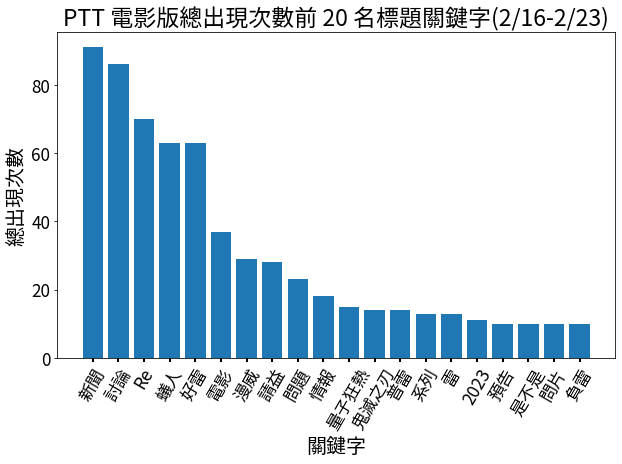

In [24]:
"""資料視覺化(長條圖)"""

top_keywords = list(frame['關鍵字'])
top_keywords_count = list(frame['次數'])
plt.figure(figsize=(10, 6))
plt.title("PTT 電影版總出現次數前 20 名標題關鍵字(2/16-2/23)", fontsize=23)
plt.bar(top_keywords, top_keywords_count, width=0.8)
plt.tick_params(axis='x', direction='out', width=2, colors='black', rotation=60)
plt.tick_params(axis='both', labelsize=17)
plt.xlabel('關鍵字', fontsize=20)
plt.ylabel('總出現次數', fontsize=20)
# plt.savefig("../PTT_freq.png", dpi=300)
# plt.show()